127.0


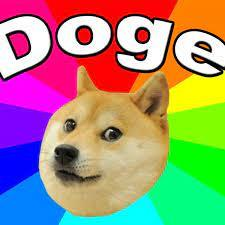

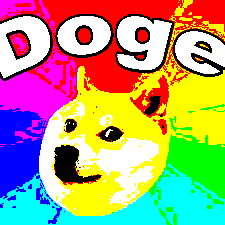

151.0
110.0
99.0


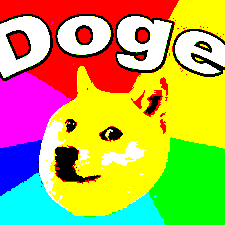

[[[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 ...

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


In [2]:
#影像二值化
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)

#變數一, 變數二=cv2.threshold(圖像變數, 門檻值, 最大值, 方法) #變數1:門檻值 , 變數2:處理出來的圖像
#門檻值是區分二值的分水嶺,最大值通常設255
#三種方法：
#cv2.THRESH_BINARY =>超過門檻值的像素設為最大值，小於的設為0 #預設的方法以這個為主
#cv2.THRESH_BINARY_INV =>超過門檻值的像素設為0，小於的設為最大值
#cv2.THRESH_OTSU => 自動計算門檻值來做二值化，可配合其他方法使用>>>(只接受單一通道的色彩空間>灰階) >>>此時方法內的參數"門檻值"會失效

th, m2=cv2.threshold(m1, 127, 255, cv2.THRESH_BINARY) #以127為分水嶺,超過的>255,低於255>0
print(th)
cv2_imshow(m1)
cv2_imshow(m2)

th, m2[:,:,0]=cv2.threshold(m1[:,:,0], 200, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) #加入自動計算門檻,這裡先處理藍色做二值化處理 #兩個方法混用要加"|"
print(th)
th, m2[:,:,1]=cv2.threshold(m1[:,:,1], 200, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) #做綠色二值化處理
print(th)
th, m2[:,:,2]=cv2.threshold(m1[:,:,2], 200, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) #做紅色二值化處理
print(th)
cv2_imshow(m2)

print(m2) #印出來可以看到數值只有0&255兩種

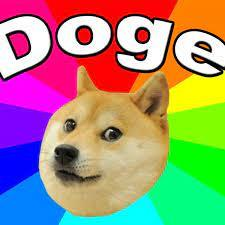

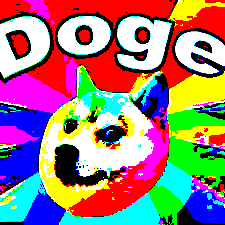

In [10]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)

m2=m1.copy() #copy一份來做變化
#「adaptiveThreshold」會自動計算門檻值，跟「threshold」函式的「THRESH_OTSU」方法不同點在於他會將整張圖像分成數個小區塊分別去計算(只接受單一通道的色彩空間)：
#結果圖像=cv2.adaptiveThreshold(圖像變數,最大值,方法一,方法二,區塊大小,微調值) ###區塊大小只能是單數,和圖的大小有關
# 方法一(是常數0 or 1)：cv2.ADAPTIVE_THRESH_MEAN_C：計算區塊大小內的平均值再減去微調值 、 cv2.ADAPTIVE_THRESH_GAUSSIAN_C：計算區塊大小內的高斯加權平均值值再減去微調值
# 方法二(是常數0 or 1)：cv2.THRESH_BINARY 、 cv2.THRESH_BINARY_INV
###只要是自動計算,都只能取灰階
m2[:,:,0]=cv2.adaptiveThreshold(m1[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,55,0) 
m2[:,:,1]=cv2.adaptiveThreshold(m1[:,:,1],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,55,0)
m2[:,:,2]=cv2.adaptiveThreshold(m1[:,:,2],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,55,0)

cv2_imshow(m1)
cv2_imshow(m2)

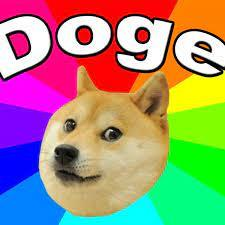

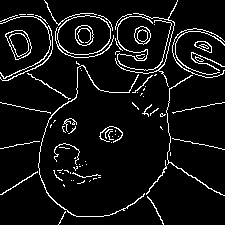

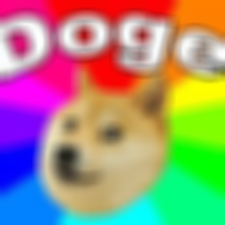

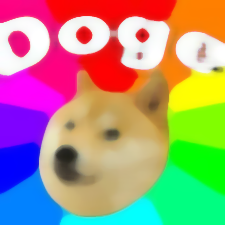

In [21]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)
#透過一大一小的門檻值，來計算圖象中的邊線 #結果圖像=cv2.Canny(圖像變數,門檻值1,門檻值2)
m2=cv2.Canny(m1,245,255)

#平均值模糊法(統計範圍內的色彩值平均)：結果圖像=cv2.blur(圖像變數,範圍大小) #有點像美肌的效果 #範圍大小就等於區塊尺寸
m3=cv2.blur(m1,(15,15))

#中值模糊法(將處理範圍內的色彩值做排序，取順序在中間的)：結果圖像=cv2.medianBlur(圖像變數,處理數量) #處理數量必須是單數,因為單數才有中位數
m4=cv2.medianBlur(m1,15)
###模糊化是不可逆的,如果模糊後再做銳利,不會完全還原
cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)



In [26]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("2.jpg",1) #放風景圖效果會比較好 #類似強化對比
# m3=cv2.blur(m1,(15,15)) #這裡是想測試先模糊再銳利化,能不能還原原圖?答案是不

m2=m1.copy()

#直方圖均衡化法：結果圖像=cv2.equalizeHist(圖像變數)  >>> 把圖片的顏色分布拉出來,把顏色的最大值調到255,最小值調到0，可以做到強化對比,清晰化的效果
m2[:,:,0]=cv2.equalizeHist(m1[:,:,0]) #對藍色做銳利化
m2[:,:,1]=cv2.equalizeHist(m1[:,:,1]) #對綠色做銳利化
m2[:,:,2]=cv2.equalizeHist(m1[:,:,2]) #對紅色做銳利化



cv2_imshow(m1)
# cv2_imshow(m3)
cv2_imshow(m2)



Output hidden; open in https://colab.research.google.com to view.

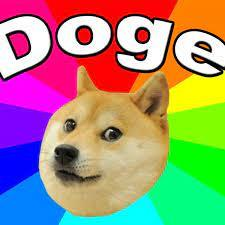

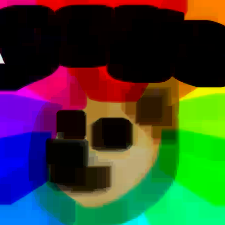

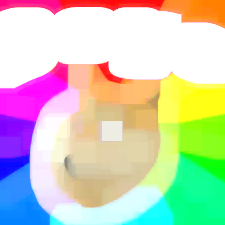

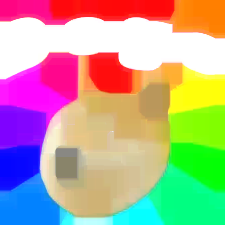

In [40]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)
#依據雜訊的色彩值運用侵蝕與膨脹,可以將雜訊清除,但是要再運用反向的方法把雜訊清除時,部分清除到的本體給部分還原

#侵蝕(色彩值低的會侵蝕色彩值高的)：結果圖像=cv2.erode(圖像變數, 結構陣列) >>結構陣列:np.ones(範圍大小) >範圍大小(有點像區塊大小):Tuple類型：(高, 寬)
#暗吃亮
m2=cv2.erode(m1,np.ones((5,5)))

#膨脹(色彩值高的會侵蝕色彩值低的)：結果圖像=cv2.dilate(圖像變數, 結構陣列) >>結構陣列:np.ones(範圍大小) >範圍大小(有點像區塊大小):Tuple類型：(高, 寬)
#亮吃暗
m3=cv2.dilate(m1,np.ones((5,5)))

m4=cv2.erode(m3,np.ones((5,5))) #這裡測試膨脹後再做侵蝕,是否可還原?

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4) #答案是不可逆,雖然會部分還原,但不接近真實,如果範圍大小大太,更無法還原

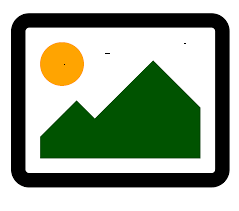

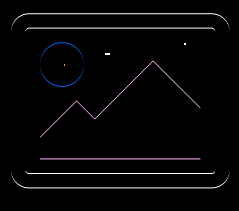

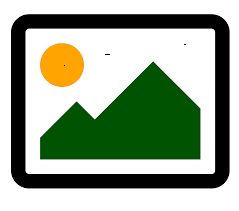

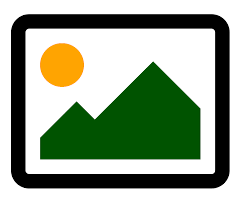

In [45]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("3.png",1) #>>> 圖可以畫個雜訊上去

#依據雜訊的色彩值運用侵蝕與膨脹,可以將雜訊清除,但是要再運用反向的方法把雜訊清除時,部分清除到的本體給部分還原 >>> 前提是雜訊不能比主體大

#結果圖像=cv2.morphologyEx(圖像變數, 方法, 結構陣列) #np.ones(範圍大小) 
#cv2.MORPH_OPEN：先執行侵蝕後執行膨脹
#cv2.MORPH_CLOSE：先執行膨脹後執行侵蝕
#cv2.MORPH_GRADIENT：執行膨脹與侵蝕產生的變化差 >>> 可以透過色彩值的變化描繪出邊緣
m2=cv2.morphologyEx(m1, cv2.MORPH_GRADIENT, np.ones((2,1)))
m3=cv2.morphologyEx(m1, cv2.MORPH_OPEN, np.ones((2,1)))
m4=cv2.morphologyEx(m1, cv2.MORPH_CLOSE, np.ones((2,1)))

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)

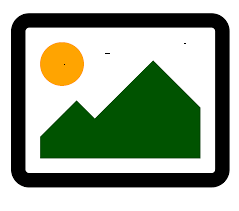

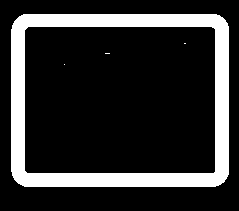

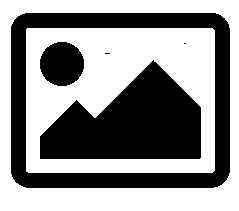

In [53]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("3.png",1)

#判斷圖像裡的各項素是否在指定色彩範圍內：結果圖像=cv2.inRange(圖像變數, 顏色下限, 顏色上限)
#在範圍內的像素會被設白色，否為則黑色
#顏色範圍：依照色彩空間的不同可傳進陣列(彩色)或單一數值(灰階)

m2=cv2.inRange(m1, (0,0,0), (50,50,50)) #標的顏色(0,0,0)~(50,50,50),會被標記為白色
m3=cv2.inRange(m1, (200,200,200), (255,255,255)) #標的顏色(200,200,200)~(255,255,255),會被標記為白色

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)

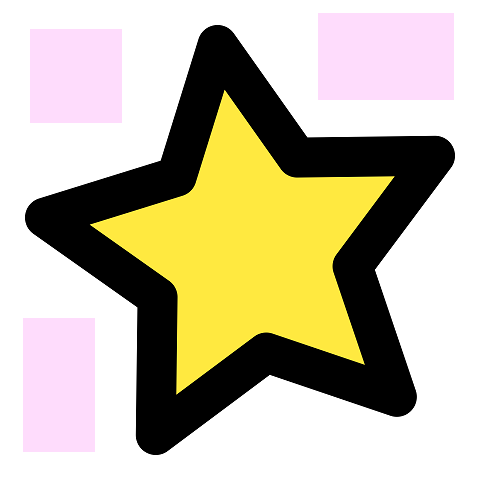

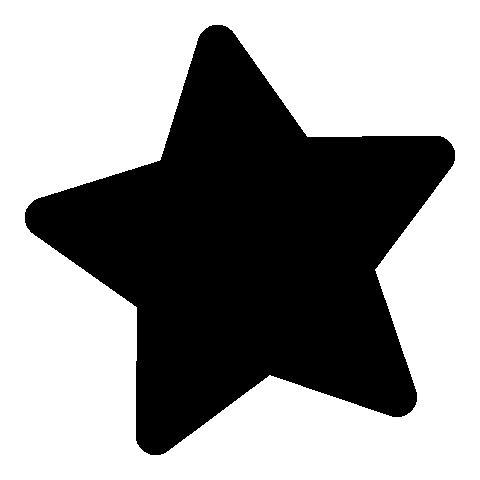

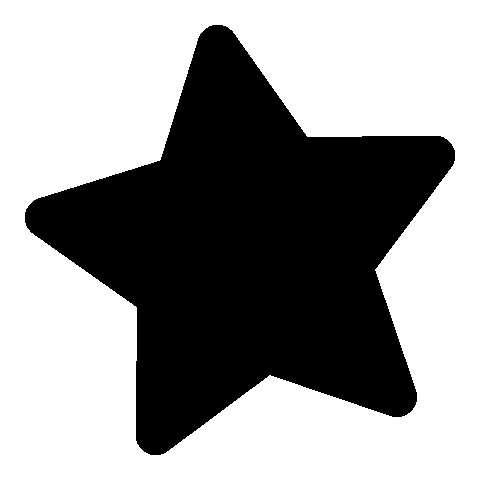

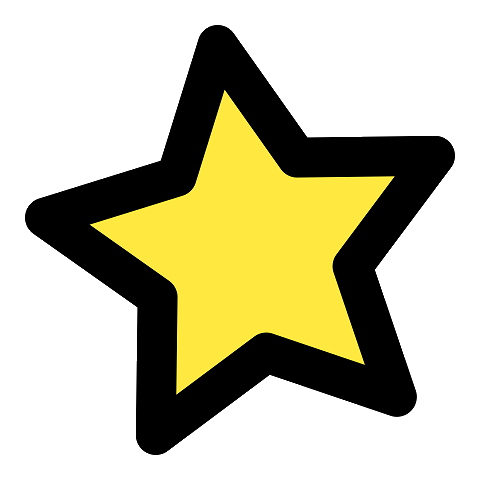

In [56]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("4.png",1)
#inRange範例處理:1.先用inRange區分背景與主體(如果雜訊有好幾個,要做好幾次,或是把inRange的值調到這個區間[要注意不能包含到目標]) 
#2.直接抓主體
m2=cv2.inRange(m1, (200,200,200), (255,255,255)) #把白色標出,這裡雜訊的粉色是BGR(252,220,254),所以也在目標內,會被標記成白色
m3=cv2.cvtColor(m2,cv2.COLOR_GRAY2BGR) #把黑白圖(灰階型態)>轉成BGR型態
m4=cv2.add(m1,m3) #做兩張圖的相加時:白色+任何色=白色(背景) 、 黑色+任何色=任何色(目標) >>> 所以可以還原圖

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)

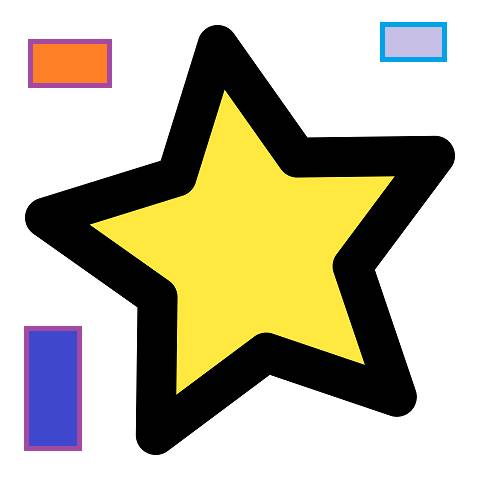

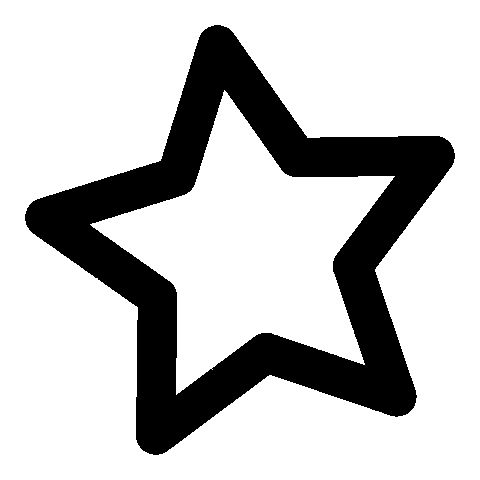

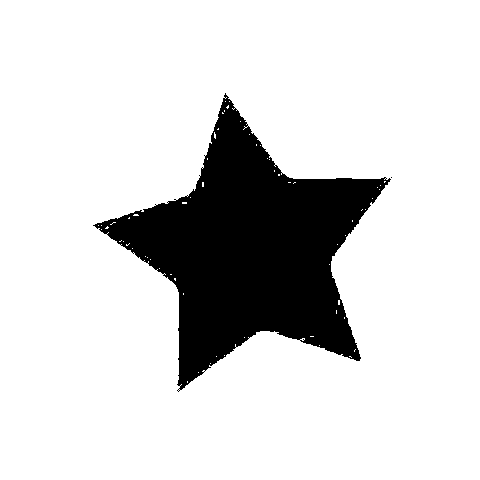

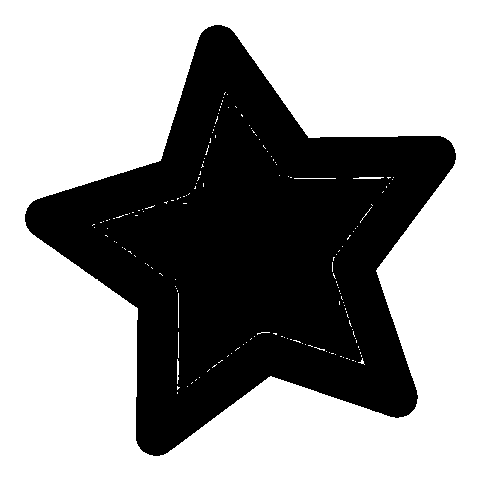

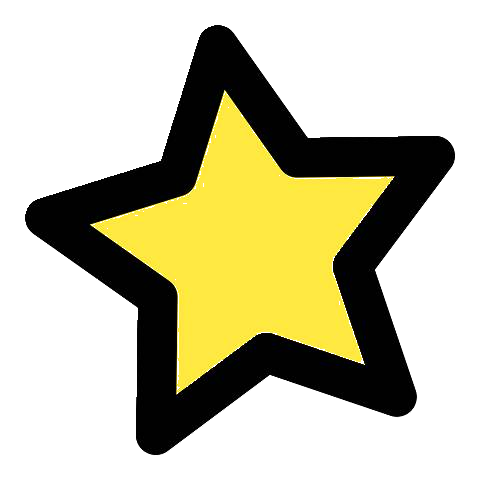

In [65]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
#示範>>>多個雜訊處理:1.用inRange標記>>>a.標記雜訊(雜訊少、單純時) b.標記主體(雜訊多,複雜時,但不能與主體相近)
m1=cv2.imread("5.jpg",1)

m2=cv2.inRange(m1, (0,0,0), (50,50,50)) #這裡想取的顏色是>黑色
m2=cv2.bitwise_not(m2) #做二進位轉,可以拿到黑白相反的圖,轉過來取白色
m3=cv2.inRange(m1, (30,200,200), (80,255,255)) #這裡取黃色,呈現白色
m3=cv2.bitwise_not(m3) #反過來,會把黃色區域標記為黑色
m4=cv2.bitwise_and(m2,m3)
m4=cv2.erode(m4,np.ones((2,2))) #侵蝕暗吃亮

m4=cv2.cvtColor(m4,cv2.COLOR_GRAY2BGR) #轉碼
m5=cv2.add(m1,m4) #相加

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)
cv2_imshow(m5)


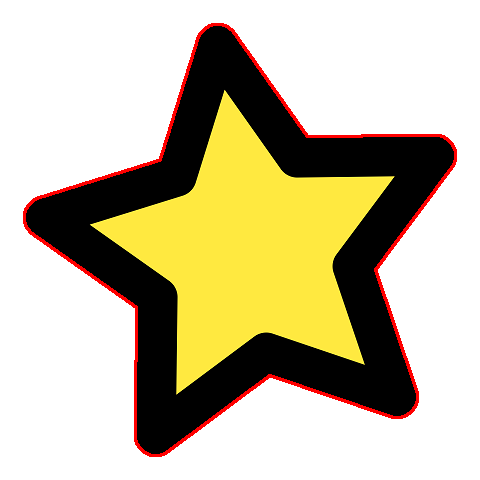

In [77]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("6.png",1)
m2=cv2.inRange(m1, (200,200,200), (255,255,255)) #先做成黑白色
#輪廓點, 輪廓階層資料=cv2.findContours(圖像變數(灰階圖像),類型,方法) >>> 取灰階[儘量是黑白]可以1.抽BGR 2.讀圖就讀灰階 3.如果圖像單純>用inRange

#類型：• cv2.RETR_EXTERNAL：只儲存最外層的輪廓  • cv2.RETR_LIST：儲存所有輪廓，但不建立階層資料  • cv2.RETR_CCOMP：儲存所有輪廓，但階層資料只包留兩層，首階層為物件外圍，第二階層為內部空心部分的輪廓，如果更內部有其餘物件，包含於首階層
#• cv2.RETR_TREE：儲存所有輪廓與其對應的階層資料

#方法：• cv2.CHAIN_APPROX_NONE：儲存所有輪廓點  • cv2.CHAIN_APPROX_SIMPLE：簡化輪廓點，一條線只儲存頭尾

a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #抓輪廓

#a：是個多維陣列，第一維指向不同的輪廓，第二維指向該輪廓對應的所有輪廓點
#b:是個多維陣列，用來記錄各個輪廓的關係，第二維指向各個輪廓，第三維會有四個值，紀錄輪廓的索引（如果為-1代表沒有），分別代表：
#1. 相鄰的下一個輪廓
#2. 相鄰的上一個輪廓
#3. 被其包覆的第一個輪廓
#4. 包覆他的輪廓

#繪製輪廓：cv2.drawContours(圖像變數,存取全部輪廓的變數,要繪製的輪廓索引,顏色,粗細)
cv2.drawContours(m1,a,1,(0,0,255),2) #畫出輪廓

cv2_imshow(m1)
# cv2_imshow(m2)


In [1]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
#解決顏色相同的雜訊>>>用大小來判斷
m1=cv2.imread("7.png",1) #/content/sample_data
m2=cv2.inRange(m1, (200,200,200), (255,255,255)) #黑白
a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #拿輪廓點
print("輪廓數量：",len(a)) #先看輪廓數量之到要跑幾圈
maxIndex=1
for i in range(1,len(a),1): #從1開始,不能包含0,因為a[0]是最外圈,範圍一定最大,會抓到他
  #取得包覆指定輪廓點的最小正矩形：X座標, Y座標, 寬度, 高度 =cv2.boundingRect(指定的輪廓) >>> xy會取到最左上角的
  x1, y1, w1, h1 =cv2.boundingRect(a[i])
  x2, y2, w2, h2 =cv2.boundingRect(a[maxIndex])
  if w1*h1>w2*h2: #比較輪廓面積大小,知道哪個是最大的(星星),存取他的索引值
    maxIndex=i
  
# cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2)
m3=np.full(m1.shape,(255,255,255),np.uint8)
cv2.drawContours(m3,a,maxIndex,(0,0,0),-1)
m3=cv2.add(m1,m3)

cv2_imshow(m1)
# cv2_imshow(m2)
cv2_imshow(m3)

error: ignored

輪廓數量： 5


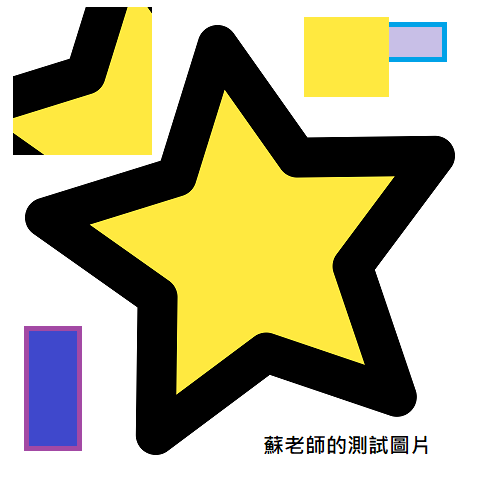

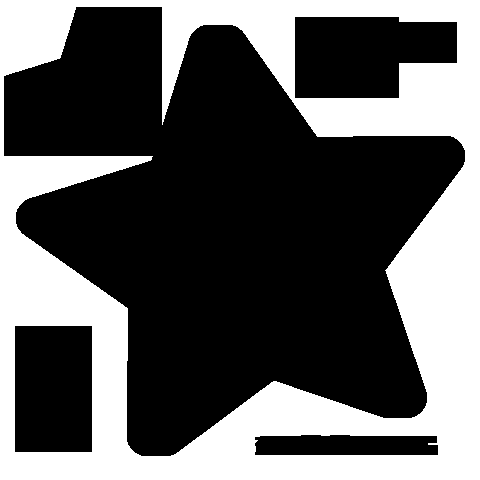

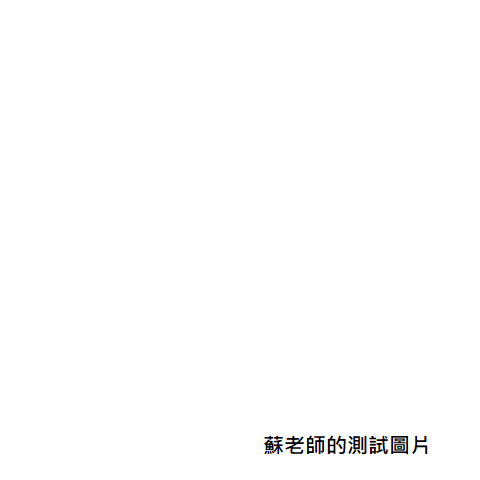

In [66]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
#改成抓字>>>不能用面積判斷,改成用長寬比來篩選
m1=cv2.imread("8.png",1)
m2=cv2.inRange(m1, (200,200,200), (255,255,255))
m2=cv2.erode(m2,np.ones((2,20))) #用侵蝕來把文字聚合在一起(不做的話輪廓會太多,抓不到),因為文字條是長方形,所以範圍可以設長方形
a, b=cv2.findContours(m2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print("輪廓數量：",len(a))

for i in range(0,len(a),1):
  x1, y1, w1, h1 =cv2.boundingRect(a[i])
  if w1>h1*3: #判斷式:抓出目標物的特徵,文字條的特徵是:長寬比很高(打越多字越高),因此這裡設寬>高的3倍
    m3=np.full(m1.shape,(255,255,255),np.uint8)
    cv2.drawContours(m3,a,i,(0,0,0),-1) #抓出他以後單獨繪出

m3=cv2.add(m1,m3) #再跟原圖相加就有了

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)